# Predictions from Data

Artificial Intelligence in the Data Science context is really _just_ predicting from existing data.  An image classifier predicts which label belongs on an image for example.  The very oldest and most powerful type of prediction is _linear regression_.  A linear regression, also called a line of best fit, extracts the underlying "truth" from noisy data.  If that underlying truth is accurate, then we can use it to fill in the gaps in the data or (if we are feeling really confident) predict into the future.

## Don't predict into the future please

In reality, a linear regression is only valid to fill gaps between the top and bottom values you already have - it is a rare problem domain where the underlying truth can be relied on to continue into the future.  In some physical measurements we might be confident the relationship holds outside the domain we have been able to measure though - in which case _extrapolation_ is valid.

## Our focus

We will focus simply on getting the linear regression from the data we have.

We will try to get a predictive model of "female literacy rates in the Arab World according to the world health organisation".  The data we need is in `data/female_literacy.csv`

<Axes: xlabel='year', ylabel='literacy'>

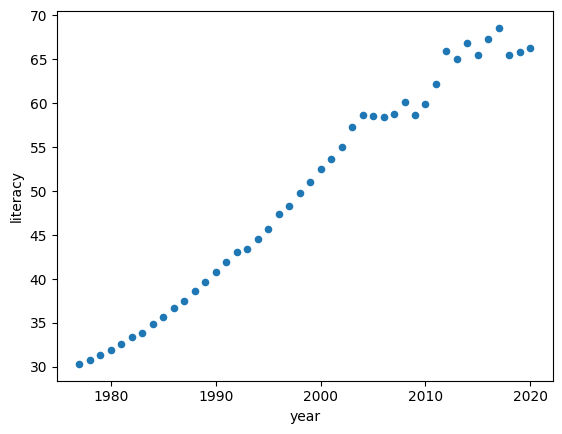

In [48]:
import pandas


literacy = pandas.read_csv("data/female_literacy.csv")

literacy.plot(kind="scatter", x="year", y="literacy")

A scatter plot shows us that it is generally increasing every year.  Note that there are no missing values in this data, each year is representented.  However, we might still want to predict the literacty rates in June 2001, which are not in the data.

# Getting a regression

The `numpy` library has what we need.  We ask it to "fit a polynomial to our data"  A polynomial is a mathematical representation of a line.  If we ask it to stick to the simplest type of polynomials, but giving it `1` as the thrid parameter, it will make sure to pick a straight line.  Parameter 1 is the "x" values, parameter 2 is the "y" values.  What is returned into variable `f` is a function which converts any x value you give it into a predicted y value.

In [49]:
import numpy


literacy = literacy.dropna()

d = numpy.polyfit(literacy["year"], literacy["literacy"], 1)
f = numpy.poly1d(d)


Let try out our new function to see what it says.  What does it think the literacy rate was in the year 2000?  How about July 2000?

In [50]:
print(f(2000))
print(f(2000.5))

51.32475091397782
51.80996651020996


Notice that the regression we got is just a function which converts x values into y values according to its prediction.

If we break the rules a little, what does it think the literacy rate will be in 2060?

In [51]:
print(f(2060))

109.55062246181433


Here you can see why looking into the future is not valid - rate of literacty can't be over 100!

More useful is to plot the regression over all the values I have for x, showing it vs the actual data.

/tmp/ipykernel_11081/823534199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  literacy["prediction"] = f(literacy["year"])


<Axes: xlabel='year', ylabel='literacy'>

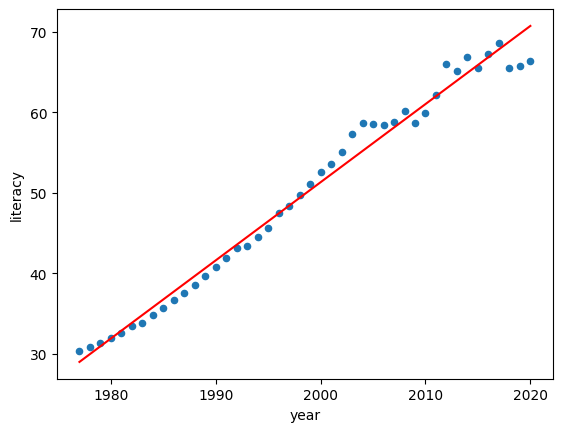

In [52]:

literacy["prediction"] = f(literacy["year"])

ax = literacy.plot(kind="scatter", x="year", y="literacy")
literacy.set_index("year")["prediction"].plot(color="red", ax=ax)

Note that using scatter for the orignal data is the right choice, as is using line for the prediction.

# Question

Why is scatter the best plot for measured data and line best for regression?

# Example

What happens as you increase the value of the last parameter to `ployfit`?  Read up a bit more about polynomial regression and try and explain what you see.  What happens to your 2060 prediction as you experiment with this parameter?  Can you explain what is going on there?